### Ensemble - Random Forest (Bagging)
1.Bagging - Creating multiple models with different structures randomly and generate output


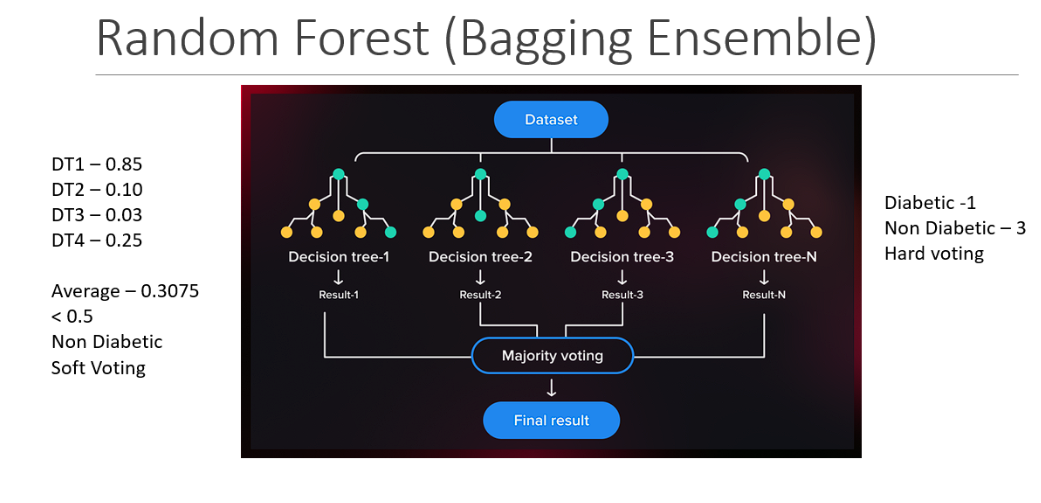

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1: Read the train dataset

In [2]:
import pandas as pd
df = pd.read_csv('train_titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Step 2: Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
m = df.isna().sum()
m


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
m[m>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [6]:
df.duplicated().sum()

0

### ### Step 3: Seperate X and Y(Survived)
Drop Passenger Id, Name, Ticket number these are statistically insignificant
Drop Cabin column because it has too many missing values

In [8]:
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'])
Y = df[['Survived']]

In [9]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [10]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [11]:
Y.value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

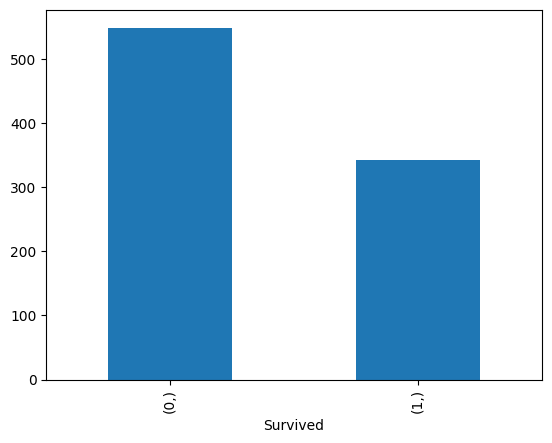

In [12]:
Y.value_counts().plot(kind='bar')

In [13]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [14]:
cat

['Sex', 'Embarked']

In [15]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [17]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])

In [18]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                           ('ohe', OneHotEncoder(handle_unknown='ignore',
                                                 sparse_output=False))])

In [19]:
pre = ColumnTransformer([('num', num_pipe, con),
                         ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [20]:
X_pre = pre.fit_transform(X)
X_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


In [21]:
### Step 5 : Apply train test split

In [22]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [23]:
xtrain.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
331,-1.566107,1.240235,-0.474545,-0.473674,-0.074583,0.0,1.0,0.0,0.0,1.0
733,-0.369365,-0.488887,-0.474545,-0.473674,-0.386671,0.0,1.0,0.0,0.0,1.0
382,0.827377,0.202762,-0.474545,-0.473674,-0.488854,0.0,1.0,0.0,0.0,1.0
704,0.827377,-0.258337,0.432793,-0.473674,-0.490280,0.0,1.0,0.0,0.0,1.0
813,0.827377,-1.795334,3.154809,2.008933,-0.018709,1.0,0.0,0.0,0.0,1.0


In [24]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [25]:
xtest.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
709,0.827377,-0.104637,0.432793,0.767630,-0.341452,0.0,1.0,1.0,0.0,0.0
439,-0.369365,0.125912,-0.474545,-0.473674,-0.437007,0.0,1.0,0.0,0.0,1.0
840,0.827377,-0.719436,-0.474545,-0.473674,-0.488854,0.0,1.0,0.0,0.0,1.0
720,-0.369365,-1.795334,-0.474545,0.767630,0.016023,1.0,0.0,0.0,0.0,1.0
39,0.827377,-1.180535,0.432793,-0.473674,-0.422074,1.0,0.0,1.0,0.0,0.0


In [26]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


In [27]:
xtrain.shape

(712, 10)

In [28]:
xtest.shape

(179, 10)

In [29]:
### Step 6: build the model

In [30]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=1,
                                criterion='gini',
                                max_depth=1, 
                                min_samples_split=5,
                                min_samples_leaf=5)
model1.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=1)

In [31]:
model1.score(xtrain, ytrain)

0.7879213483146067

In [32]:
model1.score(xtest, ytest)

0.7821229050279329

Tune the model with hyperparameter tuning

In [33]:
params1 = {'n_estimators':[10, 50, 100, 200],
           'max_depth':[1, 2, 3, 4, 5, 6, 7],
           'min_samples_split':[5, 6, 7, 8, 9, 10]}

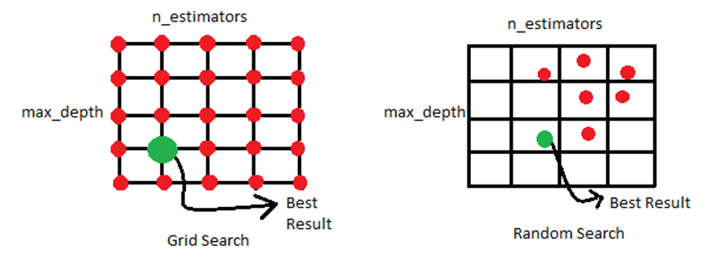

In [34]:
# For faster response use RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
rscv1 = RandomizedSearchCV(rfc, param_distributions=params1, cv=5, scoring='f1_macro')
rscv1.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [5, 6, 7, 8, 9,
                                                              10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1_macro')

In [35]:
rscv1.best_params_

{'n_estimators': 100, 'min_samples_split': 9, 'max_depth': 4}

In [36]:
rscv1.best_score_

0.8082177374840651

In [37]:
best_rfc = rscv1.best_estimator_
best_rfc

RandomForestClassifier(max_depth=4, min_samples_split=9)

Evaluate random forest

In [38]:
best_rfc.score(xtrain, ytrain)

0.8441011235955056

In [39]:
best_rfc.score(xtest, ytest)

0.7988826815642458

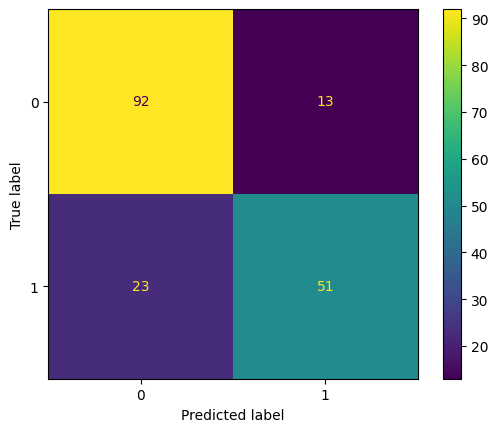

In [40]:
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_rfc, xtest, ytest)

In [41]:
# Predict the results for train and test
ypred_train = best_rfc.predict(xtrain)
ypred_test = best_rfc.predict(xtest)

In [42]:
ypred_train[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [43]:
ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [44]:
ypred_test[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [45]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


In [46]:
# Print the classification report
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



### Gradient Boosting Classifier

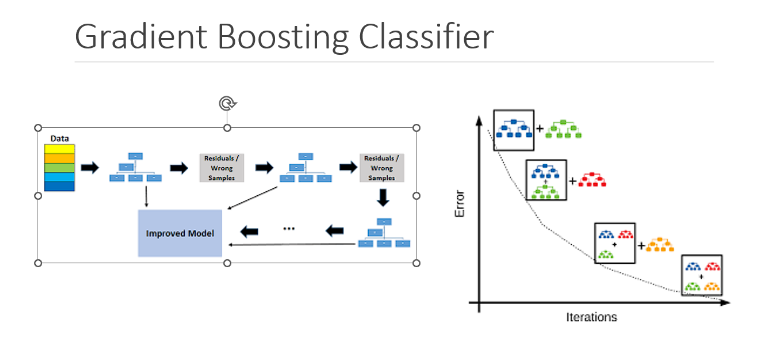

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
model2 = GradientBoostingClassifier(learning_rate=0.5,
                                    n_estimators=1,
                                    max_depth=1,
                                    min_samples_split=5,
                                    min_samples_leaf=5)
model2.fit(xtrain, ytrain)

GradientBoostingClassifier(learning_rate=0.5, max_depth=1, min_samples_leaf=5,
                           min_samples_split=5, n_estimators=1)

In [48]:
model2.score(xtrain, ytrain)

0.7879213483146067

In [49]:
model2.score(xtest, ytest)

0.7821229050279329

### Hyperparameter tuning

In [50]:

params2 = {'n_estimators':[10, 50, 100, 200, 300],
           'learning_rate':[0.01, 0.05, 0.1, 0.2],
           'max_depth':[2, 3, 4, 5, 6, 7]}

In [51]:
gbc = GradientBoostingClassifier()
rscv2 = RandomizedSearchCV(gbc, param_distributions=params2, cv=5, scoring='f1_macro')
rscv2.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'n_estimators': [10, 50, 100, 200,
                                                         300]},
                   scoring='f1_macro')

In [52]:
rscv2.best_params_

{'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.05}

In [53]:
rscv2.best_score_

0.8056236150939279

In [54]:
best_gbc = rscv2.best_estimator_
best_gbc

GradientBoostingClassifier(learning_rate=0.05, max_depth=4, n_estimators=300)

In [55]:
best_gbc.score(xtrain,ytrain)

0.952247191011236

In [56]:
best_gbc.score(xtest, ytest)

0.8268156424581006

### Evaluate model

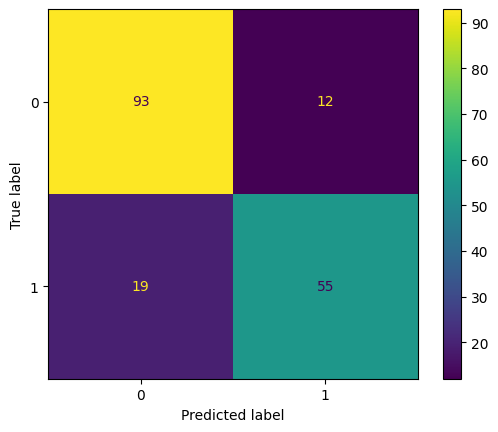

In [57]:
ConfusionMatrixDisplay.from_estimator(best_gbc, xtest, ytest)


In [58]:
ypred_train2 = best_gbc.predict(xtrain)
ypred_test2 = best_gbc.predict(xtest)

In [59]:
ypred_test2[0:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [60]:
ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


In [61]:
print(classification_report(ytest, ypred_test2))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       105
           1       0.82      0.74      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179



### Gradient Boosting model is slightly better in this case and accuracy is more than 80% in test
### Choosing Gradient boosting model for final out of sample predictions
### Plot the Feature importance

In [62]:
best_gbc.feature_importances_

array([0.1299991 , 0.16098455, 0.05410118, 0.01339281, 0.23357809,
       0.20290775, 0.18153155, 0.00696626, 0.00520066, 0.01133804])

In [63]:
xtrain.columns

Index(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Embarked_C',
       'cat__Embarked_Q', 'cat__Embarked_S'],
      dtype='object')

In [64]:
imp = pd.Series(best_gbc.feature_importances_, index=xtrain.columns)

In [65]:
imp

num__Pclass        0.129999
num__Age           0.160985
num__SibSp         0.054101
num__Parch         0.013393
num__Fare          0.233578
cat__Sex_female    0.202908
cat__Sex_male      0.181532
cat__Embarked_C    0.006966
cat__Embarked_Q    0.005201
cat__Embarked_S    0.011338
dtype: float64

In [66]:
imp.sort_values(ascending=False)

num__Fare          0.233578
cat__Sex_female    0.202908
cat__Sex_male      0.181532
num__Age           0.160985
num__Pclass        0.129999
num__SibSp         0.054101
num__Parch         0.013393
cat__Embarked_S    0.011338
cat__Embarked_C    0.006966
cat__Embarked_Q    0.005201
dtype: float64

<Axes: >

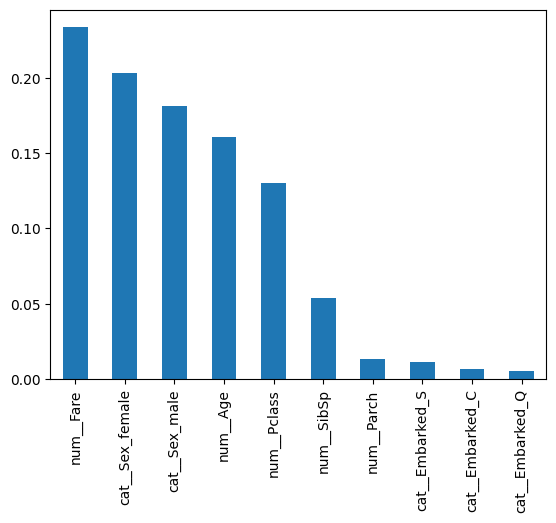

In [67]:
imp.sort_values(ascending=False).plot(kind='bar')

### Predict out of sample results

In [68]:
xnew = pd.read_csv('test_titanic.csv')
xnew.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [69]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Embarked'])])

In [70]:
xnew_pre = pre.fit_transform(xnew)
xnew_pre.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.873482,0.386231,-0.499470,-0.400248,-0.497413,0.0,1.0,0.0,1.0,0.0
1,0.873482,1.371370,0.616992,-0.400248,-0.512278,1.0,0.0,0.0,0.0,1.0
2,-0.315819,2.553537,-0.499470,-0.400248,-0.464100,0.0,1.0,0.0,1.0,0.0
3,0.873482,-0.204852,-0.499470,-0.400248,-0.482475,0.0,1.0,0.0,0.0,1.0
4,0.873482,-0.598908,0.616992,0.619896,-0.417492,1.0,0.0,0.0,0.0,1.0


### Predict the survival with probability

In [71]:
preds = best_gbc.predict(xnew_pre)
preds[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [72]:
best_gbc.classes_

array([0, 1], dtype=int64)

In [73]:
probs = best_gbc.predict_proba(xnew_pre)
probs[0:5]

array([[0.98109232, 0.01890768],
       [0.98670741, 0.01329259],
       [0.76661425, 0.23338575],
       [0.59898259, 0.40101741],
       [0.62402418, 0.37597582]])

In [74]:
prob_sur = probs[:,1]
prob_sur[0:5]

array([0.01890768, 0.01329259, 0.23338575, 0.40101741, 0.37597582])

In [75]:
# Save above results in datframe
df_final = xnew[['PassengerId']]
df_final.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [76]:

df_final['Survived_pred'] = preds
df_final['Probability'] = prob_sur

In [77]:
df_final

,PassengerId,Survived_pred,Probability
0,892,0,0.018908
1,893,0,0.013293
2,894,0,0.233386
3,895,0,0.401017
4,896,0,0.375976
...,...,...,...
413,1305,1,0.525402
414,1306,1,0.986600
415,1307,0,0.007957
416,1308,1,0.525402


In [78]:
df_final['Survived_pred'].value_counts()

Survived_pred
0    232
1    186
Name: count, dtype: int64

<Axes: xlabel='Survived_pred'>

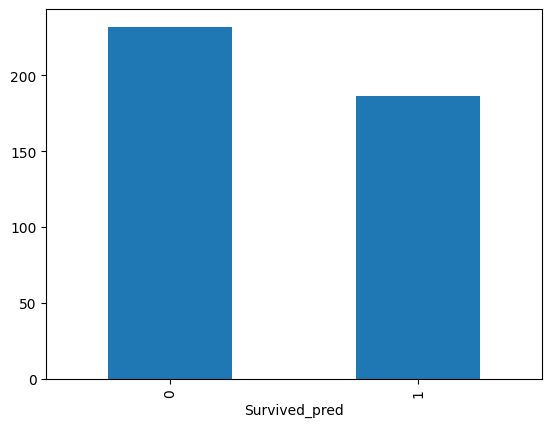

In [79]:
df_final['Survived_pred'].value_counts().plot(kind='bar')